In [1]:
import hablo_parser as hablo
import matplotlib.pyplot as plt
import numpy as np
import yaml 

In [2]:
config = yaml.load(open('perfect_foresight_normalized_lite.yaml', 'r'), Loader= hablo.get_loader())

In [3]:
config

{'calibration': [{'CRRA': 2.0},
  {'LivPrb': 0.98},
  {'DiscFac': 0.96},
  {'PermGroFac': 1.01},
  {'Rfree': 1.03},
  {'BoroCnstArt': 'None'}],
 'agents': {'consumer': {'count': 100}},
 'dynamics': {'p': 'PermGroFac * p',
  'r_eff': 'Rfree / PermGroFac',
  'b_nrm': 'r_eff * a_nrm',
  'm_nrm': 'b_nrm + 1',
  'c_nrm': <hablo_parser.Control at 0x7f3c4de50430>,
  'a_nrm': 'm_nrm - c_nrm',
  'u': 'c ** (1 - CRRA) / (1 - CRRA)'},
 'shocks': {'live': <hablo_parser.Bernoulli at 0x7f3c4de50490>}}

In [4]:
config['dynamics']

{'p': 'PermGroFac * p',
 'r_eff': 'Rfree / PermGroFac',
 'b_nrm': 'r_eff * a_nrm',
 'm_nrm': 'b_nrm + 1',
 'c_nrm': <hablo_parser.Control at 0x7f3c4de50430>,
 'a_nrm': 'm_nrm - c_nrm',
 'u': 'c ** (1 - CRRA) / (1 - CRRA)'}

In [5]:
hablo.math_text_to_lambda(config['dynamics']['p'])

<function _lambdifygenerated(p, PermGroFac)>

In [6]:
hablo.math_text_to_lambda(config['dynamics']['r_eff'])

<function _lambdifygenerated(Rfree, PermGroFac)>

In [7]:
hablo.math_text_to_lambda(config['dynamics']['m_nrm'])

<function _lambdifygenerated(b_nrm)>

In [8]:
hablo.math_text_to_lambda(config['dynamics']['a_nrm'])

<function _lambdifygenerated(c_nrm, m_nrm)>

In [9]:
hablo.math_text_to_lambda(config['dynamics']['u'])

<function _lambdifygenerated(CRRA, c)>

In [10]:
a_hexp = hablo.HabloExpression(config['dynamics']['a_nrm'])

In [11]:
a_hexp.expr

-c_nrm + m_nrm

In [12]:
a_hexp.diffs

{'c_nrm': -1, 'm_nrm': 1}

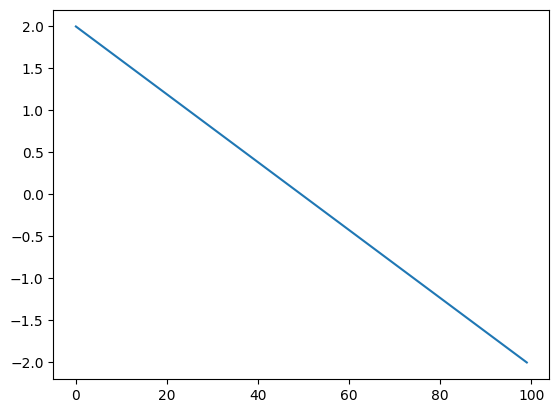

In [13]:
x = np.linspace(0,4,100)

plt.plot(a_hexp.npf(x, 2))

In [14]:
u_hexp = hablo.HabloExpression(config['dynamics']['u'])

In [15]:
u_hexp.expr

c**(1 - CRRA)/(1 - CRRA)

In [16]:
u_hexp.diffs

{'CRRA': -c**(1 - CRRA)*log(c)/(1 - CRRA) + c**(1 - CRRA)/(1 - CRRA)**2,
 'c': c**(1 - CRRA)/c}

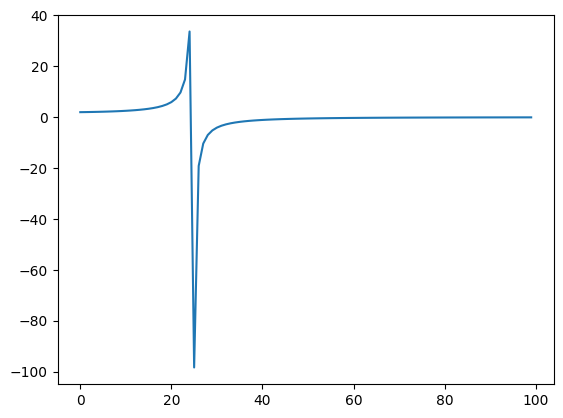

In [17]:
x = np.linspace(0,4,100)

plt.plot(u_hexp.npf(x, 2))

## What about indexed symbols? Not out of the box...

We will need to build something extra to handle indexed symbols.

In [18]:
hablo.math_text_to_lambda('Rfree / PermGroFac[age]')

TypeError: 'Symbol' object is not subscriptable